<a href="https://colab.research.google.com/github/ambroz72/Data-analytics-/blob/master/Sales_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset

In [5]:
data=pd.read_excel('company_data.xlsx')

In [7]:
data.head()

,Order ID,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country
0,7077,42991,76.094968,304.00,9,684.854710,2714.7200,2029.865290,Store,European Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Europe,Moscow,Russia
1,117,42602,7.491753,12.99,4,29.967011,50.1414,20.174389,Store,European Spring Promotion,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",MP4&MP3,Audio,Europe,Moscow,Russia
2,7018,42559,10.122338,159.99,9,91.101039,1395.1128,1304.011761,Store,European Spring Promotion,Contoso DVD 9-Inch Player Portable M300 Silver,"Contoso, Ltd",Movie DVD,"Music, Movies and Audio Books",Europe,Moscow,Russia
3,140,43323,0.576153,25.69,18,10.370759,462.4200,452.049241,Store,North America Spring Promotion,NT Bluetooth Stereo Headphones E52 Pink,Northwind Traders,Bluetooth Headphones,Audio,North America,Bellevue,United States
4,491,42931,108.508777,304.00,9,976.578991,2614.4000,1637.821009,Online,Asian Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Asia,Beijing,China


In [10]:
data.describe()

,Order ID,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,11209.316600,43007.083600,124.425132,296.514697,16.741733,1586.954833,3692.783986,2105.829152
std,6451.583877,316.044076,163.569912,345.985232,43.490032,2408.961430,4917.886955,3387.145437
min,1.000000,42523.000000,0.001576,0.950000,4.000000,0.015756,4.750000,-838.426733
25%,5629.750000,42728.000000,16.847345,59.000000,9.000000,189.677420,645.000000,242.198732
50%,11238.500000,42964.000000,69.688876,205.000000,10.000000,752.752320,2301.175750,1012.683637
75%,16789.500000,43269.000000,164.348636,366.000000,13.000000,2006.030237,4767.720000,2573.128436
max,22352.000000,43618.000000,1896.133845,2899.990000,1560.000000,42991.137192,78312.000000,55692.569522


In [ ]:
# Data cleaning

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              15000 non-null  int64  
 1   Order Date            15000 non-null  int64  
 2   Unit Cost             15000 non-null  float64
 3   Price                 15000 non-null  float64
 4   Order Qty             15000 non-null  int64  
 5   Cost of Sales         15000 non-null  float64
 6   Sales                 15000 non-null  float64
 7   Profit                15000 non-null  float64
 8   Channel               15000 non-null  object 
 9   Promotion Name        15000 non-null  object 
 10  Product Name          15000 non-null  object 
 11  Manufacturer          15000 non-null  object 
 12  Product Sub Category  15000 non-null  object 
 13  Product Category      15000 non-null  object 
 14  Region                15000 non-null  object 
 15  City               

In [11]:
data.isnull().sum()

,0
Order ID,0
Order Date,0
Unit Cost,0
Price,0
Order Qty,0
Cost of Sales,0
Sales,0
Profit,0
Channel,0
Promotion Name,0


In [17]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [19]:
data

,Order ID,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country
0,7077,1970-01-01 00:00:00.000042991,76.094968,304.00,9,684.854710,2714.7200,2029.865290,Store,European Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Europe,Moscow,Russia
1,117,1970-01-01 00:00:00.000042602,7.491753,12.99,4,29.967011,50.1414,20.174389,Store,European Spring Promotion,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",MP4&MP3,Audio,Europe,Moscow,Russia
2,7018,1970-01-01 00:00:00.000042559,10.122338,159.99,9,91.101039,1395.1128,1304.011761,Store,European Spring Promotion,Contoso DVD 9-Inch Player Portable M300 Silver,"Contoso, Ltd",Movie DVD,"Music, Movies and Audio Books",Europe,Moscow,Russia
3,140,1970-01-01 00:00:00.000043323,0.576153,25.69,18,10.370759,462.4200,452.049241,Store,North America Spring Promotion,NT Bluetooth Stereo Headphones E52 Pink,Northwind Traders,Bluetooth Headphones,Audio,North America,Bellevue,United States
4,491,1970-01-01 00:00:00.000042931,108.508777,304.00,9,976.578991,2614.4000,1637.821009,Online,Asian Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Asia,Beijing,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,22348,1970-01-01 00:00:00.000042646,16.240455,25.00,12,194.885455,300.0000,105.114545,Store,Asian Summer Promotion,Contoso USB Cable M250 Blue,"Contoso, Ltd",Cameras & Camcorders Accessories,Cameras and camcorders,Asia,Osaka,Japan
14996,22349,1970-01-01 00:00:00.000042663,55.387212,999.00,10,553.872121,9990.0000,9436.127879,Reseller,No Discount,WWI Projector 720p DLP56 White,Wide World Importers,Projectors & Screens,Computers,Europe,Paris,France
14997,22350,1970-01-01 00:00:00.000042875,363.634986,588.00,13,4727.254816,7408.8000,2681.545184,Store,North America Holiday Promotion,"A. Datum SLR Camera 35"" X358 Gold",A. Datum Corporation,Digital SLR Cameras,Cameras and camcorders,North America,Ithaca,United States
14998,22351,1970-01-01 00:00:00.000043044,113.237461,279.00,12,1358.849536,3348.0000,1989.150464,Online,Asian Summer Promotion,Adventure Works LCD20W M240 Black,Adventure Works,Monitors,Computers,Asia,Beijing,China


In [23]:
# Optional: Convert 'Date' column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [24]:
# Create additional useful columns
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year
data['Month_Year'] = data['Order Date'].dt.to_period('M')

In [26]:
data

,Order ID,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country,Month,Year,Month_Year
0,7077,1970-01-01 00:00:00.000042991,76.094968,304.00,9,684.854710,2714.7200,2029.865290,Store,European Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Europe,Moscow,Russia,1,1970,1970-01
1,117,1970-01-01 00:00:00.000042602,7.491753,12.99,4,29.967011,50.1414,20.174389,Store,European Spring Promotion,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",MP4&MP3,Audio,Europe,Moscow,Russia,1,1970,1970-01
2,7018,1970-01-01 00:00:00.000042559,10.122338,159.99,9,91.101039,1395.1128,1304.011761,Store,European Spring Promotion,Contoso DVD 9-Inch Player Portable M300 Silver,"Contoso, Ltd",Movie DVD,"Music, Movies and Audio Books",Europe,Moscow,Russia,1,1970,1970-01
3,140,1970-01-01 00:00:00.000043323,0.576153,25.69,18,10.370759,462.4200,452.049241,Store,North America Spring Promotion,NT Bluetooth Stereo Headphones E52 Pink,Northwind Traders,Bluetooth Headphones,Audio,North America,Bellevue,United States,1,1970,1970-01
4,491,1970-01-01 00:00:00.000042931,108.508777,304.00,9,976.578991,2614.4000,1637.821009,Online,Asian Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Asia,Beijing,China,1,1970,1970-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,22348,1970-01-01 00:00:00.000042646,16.240455,25.00,12,194.885455,300.0000,105.114545,Store,Asian Summer Promotion,Contoso USB Cable M250 Blue,"Contoso, Ltd",Cameras & Camcorders Accessories,Cameras and camcorders,Asia,Osaka,Japan,1,1970,1970-01
14996,22349,1970-01-01 00:00:00.000042663,55.387212,999.00,10,553.872121,9990.0000,9436.127879,Reseller,No Discount,WWI Projector 720p DLP56 White,Wide World Importers,Projectors & Screens,Computers,Europe,Paris,France,1,1970,1970-01
14997,22350,1970-01-01 00:00:00.000042875,363.634986,588.00,13,4727.254816,7408.8000,2681.545184,Store,North America Holiday Promotion,"A. Datum SLR Camera 35"" X358 Gold",A. Datum Corporation,Digital SLR Cameras,Cameras and camcorders,North America,Ithaca,United States,1,1970,1970-01
14998,22351,1970-01-01 00:00:00.000043044,113.237461,279.00,12,1358.849536,3348.0000,1989.150464,Online,Asian Summer Promotion,Adventure Works LCD20W M240 Black,Adventure Works,Monitors,Computers,Asia,Beijing,China,1,1970,1970-01


In [29]:
# First, make sure 'Order Date' is numeric
data['Order Date'] = pd.to_numeric(data['Order Date'], errors='coerce')


In [30]:
# Convert serial numbers to datetime
data['Order Date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(data['Order Date'], unit='D')


In [31]:
# Create extra columns for time-based analysis

# Create extra date-related columns for analysis
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year
data['Month_Year'] = data['Order Date'].dt.to_period('M')

data[['Order Date', 'Month', 'Year', 'Month_Year']].head()


,Order Date,Month,Year,Month_Year
0,2017-09-13,9,2017,2017-09
1,2016-08-20,8,2016,2016-08
2,2016-07-08,7,2016,2016-07
3,2018-08-11,8,2018,2018-08
4,2017-07-15,7,2017,2017-07


In [ ]:
# sales Trend Over Time

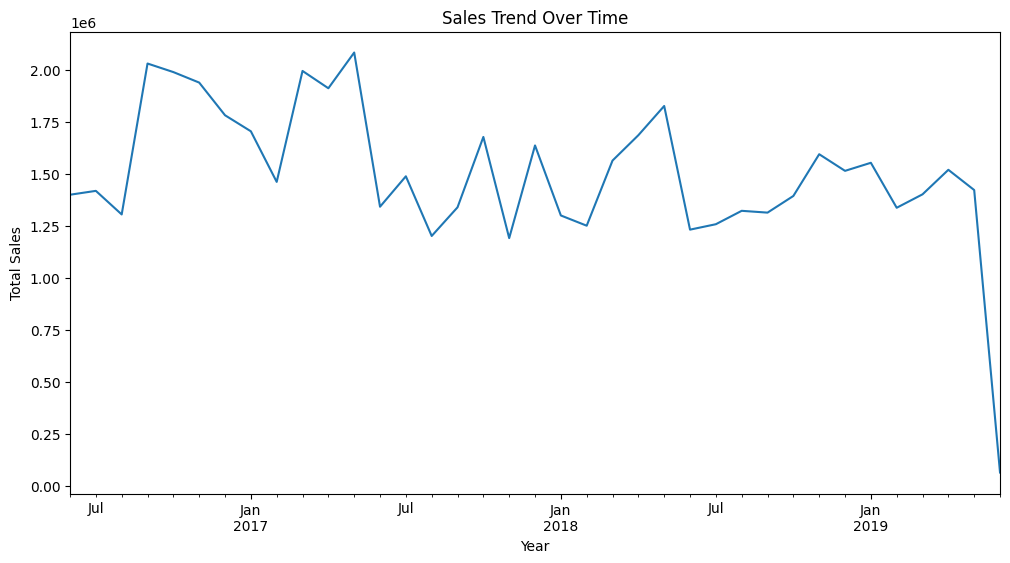

In [32]:
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

In [33]:
# Peak sales Season

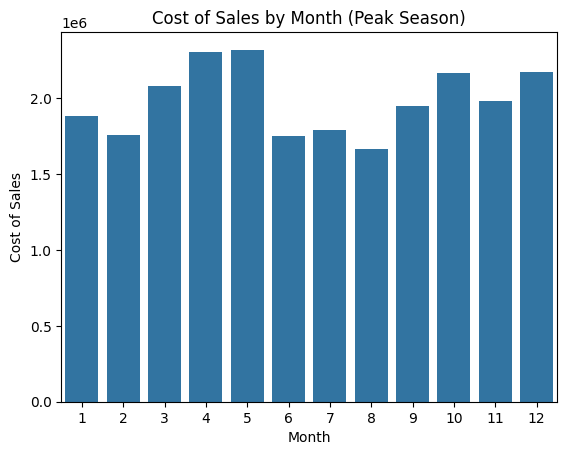

In [35]:
# Total revenue by month
monthly = data.groupby('Month')['Cost of Sales'].sum()
sns.barplot(x=monthly.index, y=monthly.values)
plt.title('Cost of Sales by Month (Peak Season)')
plt.xlabel('Month')
plt.ylabel('Cost of Sales')
plt.show()


In [ ]:
# Top Products by Sales

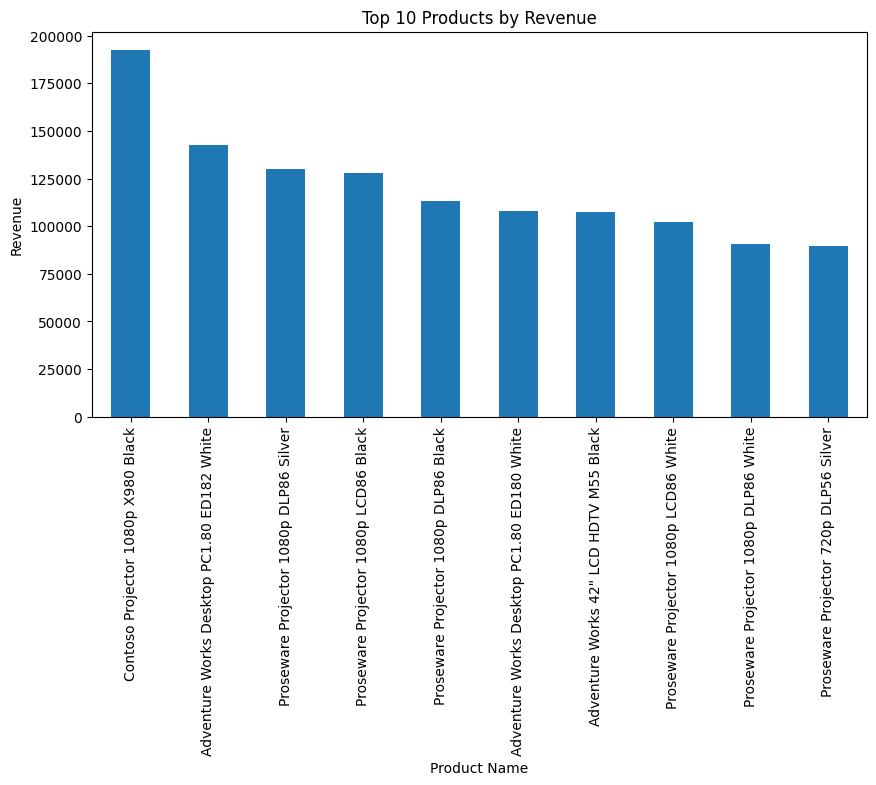

In [38]:
# Top 10 products by revenue
top_products = data.groupby('Product Name')['Cost of Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.show()


Sales by Regional or Channel Analysis (Optional if you have region/channel)


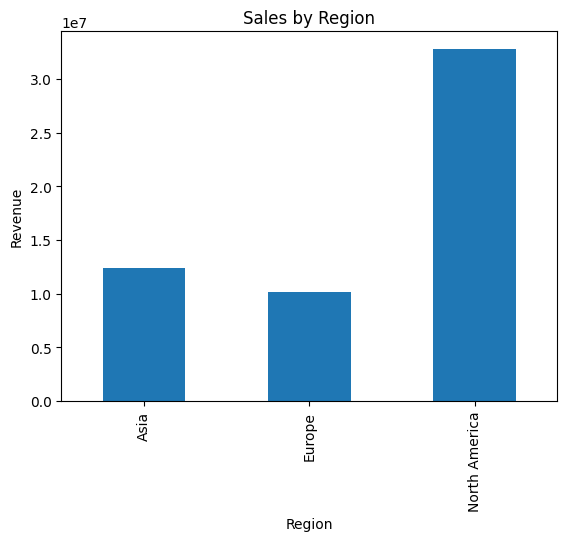

In [39]:
# Example: Sales by Region
region_sales = data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', title='Sales by Region')
plt.ylabel('Revenue')
plt.show()


In [41]:
summary = data.groupby('Product Name').agg({'Order Qty':'sum', 'Sales':'sum'}).sort_values(by='Sales', ascending=False)
summary.head(10)


,Order Qty,Sales
Product Name,,
Contoso Projector 1080p X980 Black,197,445115.250
Proseware Projector 1080p LCD86 White,186,417575.250
Contoso Projector 1080p X980 White,177,399903.750
Proseware Projector 1080p LCD86 Black,160,360567.450
Proseware Projector 1080p DLP86 Silver,147,358806.420
Proseware Projector 1080p DLP86 Black,131,321871.200
Adventure Works Desktop PC1.80 ED182 White,580,288272.334
"Fabrikam Independent Filmmaker 1"" 25mm X400 Blue",173,275157.000
WWI Laptop19W X0196 Blue,209,266359.950
